In [1]:
import cv2
import glob
import os
import csv
import progressbar
from random import uniform
import numpy as np
from libs.Equirec2Perspec import Equirectangular as E2P
from libs.projections import rotateSP
from PIL import Image
import matplotlib.image as img 
import matplotlib.pyplot as plt

def make360Datalist(fname):
	'''
	construct 360 panorama data list with labels:
	panoID =>> sun position(theta,phi), turbidity, exposure
	'''
	data_list = []
	with open(fname, newline='') as f:
		rows = csv.DictReader(f)
		for row in rows:
			panoID, tur, omg = row['PanoID'], row['turbidity'], row['exposure']
			sunpos = np.array([float(row['theta']), float(row['phi'])])
			data_list.append({'panoID': panoID, 'sunpos': sunpos, 'turbidity': tur, 'exposure': omg})
	return data_list

def cropPano(img_path, theta, sunpos):
	'''
	random crop perspective image at given theta value (320 x 240)
	elevation: [-10, 10], fov: [60, 100]
	'''
	e2p = E2P(img_path)
	elevation, fov = round(uniform(-10, 10), 2), round(uniform(60, 100), 2)
	img = e2p.GetPerspective(fov, theta, elevation, 240, 320)
	new_sunpos = rotateSP(sunpos, theta, -elevation)
	return img, new_sunpos, elevation, fov

def main():
	print('Preparing data ..')
	pano_data = make360Datalist('./data/GS_skymodel.csv')

	mode = 'test'
	print('Start croping and constrcut final dataset list ...')
	fname = './data/' + mode + '_list.csv'
	with open(fname, 'w', newline = '') as f:
		fieldnames = ['filepath', 'theta', 'phi', 'turbidity', 'exposure', 'elevation', 'fov']
		writer = csv.DictWriter(f, fieldnames=fieldnames)
		writer.writeheader()
		bar = progressbar.ProgressBar()
		for i in bar(range(len(pano_data))):
			img_path = './dashcam_illumination/' + mode + '/' + pano_data[i]['panoID'] + '.png'
			print(pano_data[0])
			if os.path.isfile(img_path):
				print("!!!")
				tur, omg = pano_data[i]['turbidity'], pano_data[i]['exposure']
				#### Two cropping/saving processes: front and back view ####
				crop, sp, ele, fov = cropPano(img_path, 0, pano_data[i]['sunpos'])
				save_name = 'dashcam_illumination/' + mode + '/' + pano_data[i]['panoID'] + '_F.png'
				cv2.imwrite(save_name, crop)
				writer.writerow({'filepath': save_name, 'theta': sp[0], 'phi': sp[1], 'turbidity': tur, 'exposure': omg, 'elevation': ele, 'fov': fov})
				crop, sp, ele, fov = cropPano(img_path, 180, pano_data[i]['sunpos'])
				save_name = 'dashcam_illumination/' + mode + '/' + pano_data[i]['panoID'] + '_B.png'
				cv2.imwrite(save_name, crop)
				writer.writerow({'filepath': save_name, 'theta': sp[0], 'phi': sp[1], 'turbidity': tur, 'exposure': omg, 'elevation': ele, 'fov': fov})
	print('Done!')


Bad key text.latex.unicode in file /home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https:/

In [2]:
img_path = './CAU_front.jpg'

In [3]:
sunpos = [3.4, 54]

In [4]:
crop1, sp1, ele1, fov1 = cropPano(img_path, 0, sunpos)
crop2, sp2, ele2, fov2 = cropPano(img_path, 180, sunpos)

In [8]:
# brg to rgb
crop1 = crop1[...,::-1].copy()
crop2 = crop2[...,::-1].copy()

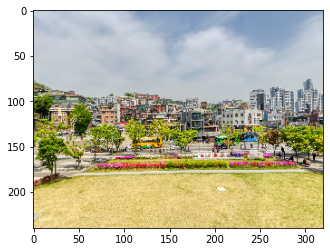

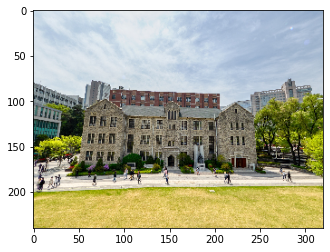

In [9]:
plt.imshow(crop1)
plt.show()

plt.imshow(crop2)
plt.show()